In [64]:
# Basic data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [65]:
# Correct path after renaming
df = pd.read_csv("../data/adult.csv")


print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [66]:
print("Column names in dataset:")
print(df.columns.tolist())


Column names in dataset:
['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [67]:
print(df.columns)


Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [68]:
display(df.head())
display(df.tail())


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [69]:
print(df['age'].value_counts().sort_index())
print(df['education'].value_counts())
print(df['educational-num'].value_counts())
print(df['fnlwgt'].describe())
print(df['hours-per-week'].describe())


age
17     595
18     862
19    1053
20    1113
21    1096
      ... 
86       1
87       3
88       6
89       2
90      55
Name: count, Length: 74, dtype: int64
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64
educational-num
9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: count, dtype: int64
count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64
count    4

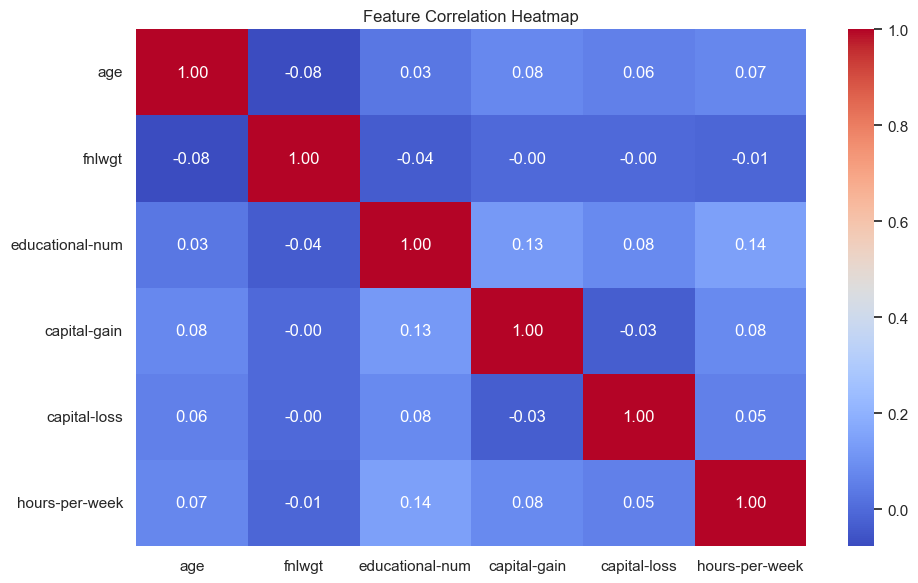

In [70]:
# 🔍 Correlation heatmap of numeric features

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


In [71]:
# Drop low-value or redundant features
df.drop(['fnlwgt', 'education'], axis=1, inplace=True)


In [72]:
# Info summary
df.info()

# Check for null values
print("\nMissing values in each column:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   educational-num  48842 non-null  int64 
 3   marital-status   48842 non-null  object
 4   occupation       48842 non-null  object
 5   relationship     48842 non-null  object
 6   race             48842 non-null  object
 7   gender           48842 non-null  object
 8   capital-gain     48842 non-null  int64 
 9   capital-loss     48842 non-null  int64 
 10  hours-per-week   48842 non-null  int64 
 11  native-country   48842 non-null  object
 12  income           48842 non-null  object
dtypes: int64(5), object(8)
memory usage: 4.8+ MB

Missing values in each column:
age                0
workclass          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race    

In [73]:
# See the value counts for target
print("Income Class Distribution:")
print(df['income'].value_counts())



Income Class Distribution:
income
<=50K    37155
>50K     11687
Name: count, dtype: int64


In [74]:
# Replace '?' with 'Others' in selected categorical columns
for col in ['workclass', 'occupation', 'native-country']:
    df[col] = df[col].replace('?', 'Others')

# Confirm replacements
print("Unique values after replacing '?' with 'Others':")
for col in ['workclass', 'occupation', 'native-country']:
    print(f"{col}: {df[col].unique()}")

# Check for any remaining missing values
print("\nMissing values after replacement:")
print(df.isnull().sum())

# Drop any actual missing (NaN) rows, if any
df.dropna(inplace=True)
print("\nShape after dropping any remaining NaNs:", df.shape)


Unique values after replacing '?' with 'Others':
workclass: ['Private' 'Local-gov' 'Others' 'Self-emp-not-inc' 'Federal-gov'
 'State-gov' 'Self-emp-inc' 'Without-pay' 'Never-worked']
occupation: ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Others'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
native-country: ['United-States' 'Others' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada' 'Portugal'
 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica' 'Ecuador'
 'Yugoslavia' 'Hungary' 'Hong' 'Greece' 'Trinadad&Tobago'
 'Outlying-US(Guam-USVI-etc)' 'France' 'Holand-Netherlands']

Missing values after replacement:
age                0
workclass    

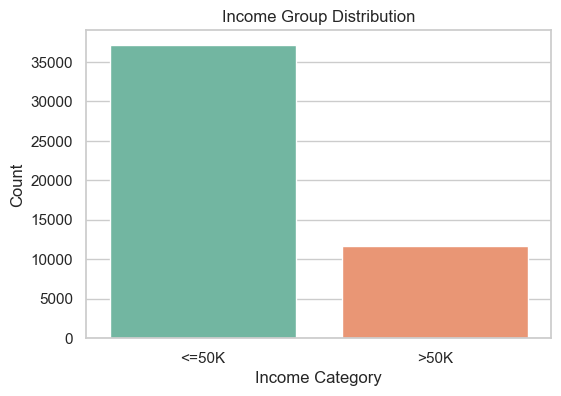

In [75]:
plt.figure(figsize=(6, 4))
sns.countplot(x='income', data=df, hue='income', palette='Set2', legend=False)
plt.title("Income Group Distribution")
plt.xlabel("Income Category")
plt.ylabel("Count")
plt.show()


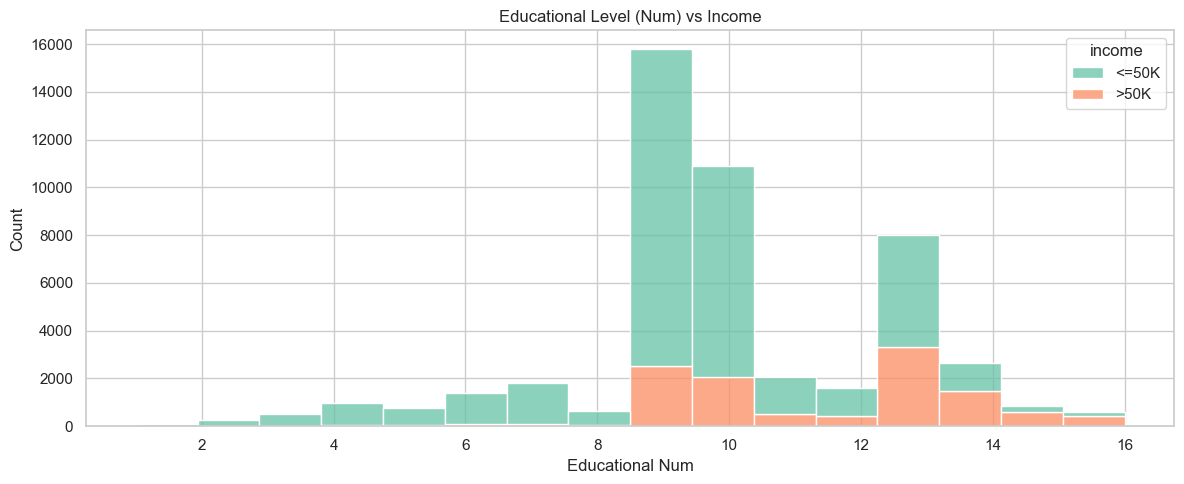

In [76]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x='educational-num', hue='income', multiple='stack', palette='Set2', bins=16)
plt.title("Educational Level (Num) vs Income")
plt.xlabel("Educational Num")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


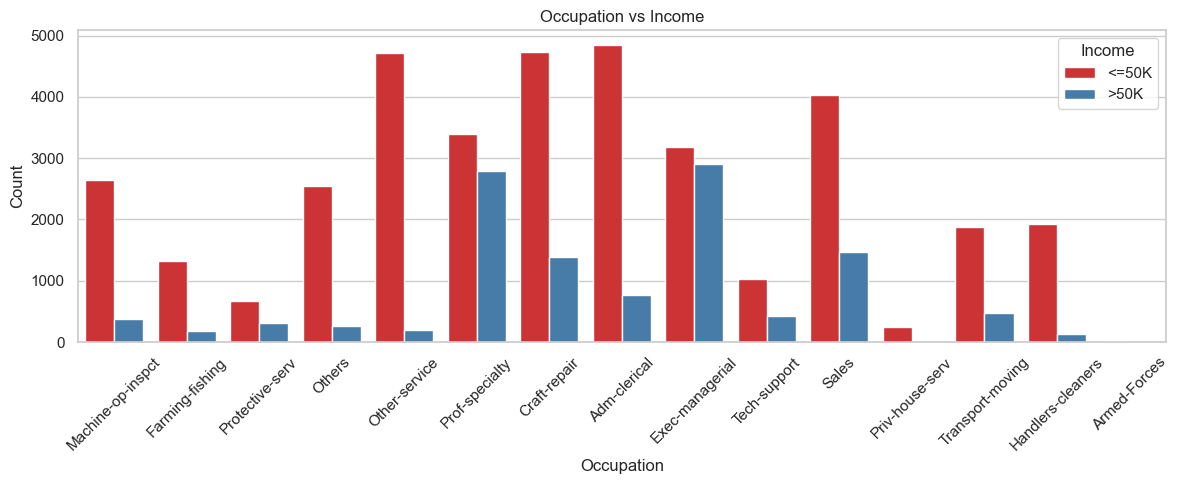

In [77]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='occupation', hue='income', palette='Set1')
plt.title("Occupation vs Income")
plt.xticks(rotation=45)
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.legend(title="Income")
plt.tight_layout()
plt.show()


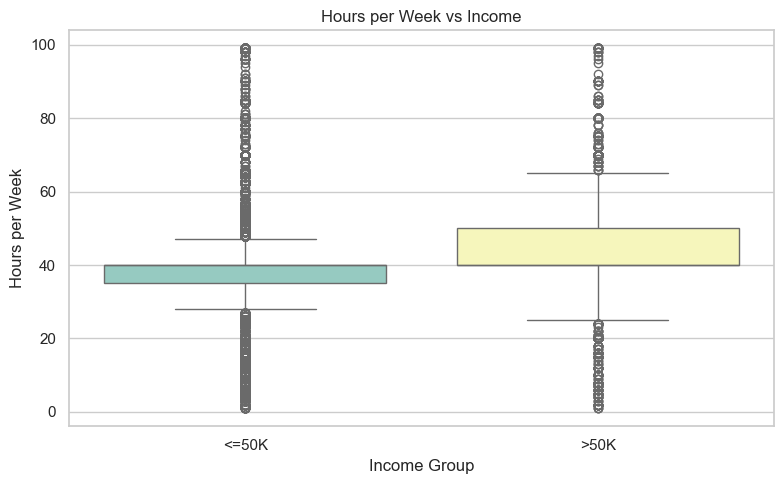

In [78]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='income', y='hours-per-week', hue='income', palette='Set3', legend=False)
plt.title("Hours per Week vs Income")
plt.xlabel("Income Group")
plt.ylabel("Hours per Week")
plt.tight_layout()
plt.show()


In [79]:
# Cell 10: Replace '?' with NaN and drop missing rows

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Check how many nulls exist now
print("Missing values after replacement:")
print(df.isnull().sum())

# Drop all rows with any missing values
df.dropna(inplace=True)

# Confirm shape after dropping
print("Shape after cleaning:", df.shape)


Missing values after replacement:
age                0
workclass          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64
Shape after cleaning: (48842, 13)


In [80]:
# Cell 11: Encode all categorical columns using LabelEncoder

# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns
print("Categorical columns to encode:", cat_cols.tolist())

# Label encode each categorical column
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


Categorical columns to encode: ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


In [81]:
# Cell 12: Feature-target split and train-test split

# Separate features (X) and target (y)
X = df.drop('income', axis=1)
y = df['income']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (39073, 12)
Testing set shape: (9769, 12)


In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [83]:
# Cell 13: Logistic Regression model

# Initialize and train
log_model = LogisticRegression(max_iter=2000)

log_model.fit(X_train, y_train)

# Predict
y_pred_log = log_model.predict(X_test)

# Evaluate
print("📘 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


📘 Logistic Regression Results
Accuracy: 0.8279250690961204

Confusion Matrix:
 [[7047  432]
 [1249 1041]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      7479
           1       0.71      0.45      0.55      2290

    accuracy                           0.83      9769
   macro avg       0.78      0.70      0.72      9769
weighted avg       0.82      0.83      0.81      9769



In [84]:
# Cell 14: Decision Tree Classifier

# Initialize and train
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predict
y_pred_tree = tree_model.predict(X_test)

# Evaluate
print("🌳 Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))


🌳 Decision Tree Results
Accuracy: 0.8237281195618794

Confusion Matrix:
 [[6631  848]
 [ 874 1416]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89      7479
           1       0.63      0.62      0.62      2290

    accuracy                           0.82      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.82      0.82      0.82      9769



In [85]:
# Cell 15: Random Forest Classifier

# Initialize and train
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)

# Predict
y_pred_forest = forest_model.predict(X_test)

# Evaluate
print("🌲 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_forest))
print("\nClassification Report:\n", classification_report(y_test, y_pred_forest))


🌲 Random Forest Results
Accuracy: 0.8570989865902344

Confusion Matrix:
 [[6889  590]
 [ 806 1484]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      7479
           1       0.72      0.65      0.68      2290

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.86      0.85      9769



In [86]:
# Cell 16: K-Nearest Neighbors (scaled input)

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

print("🔵 KNN Results (with scaling)")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))


🔵 KNN Results (with scaling)
Accuracy: 0.8368307912785341

Confusion Matrix:
 [[6778  701]
 [ 893 1397]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89      7479
           1       0.67      0.61      0.64      2290

    accuracy                           0.84      9769
   macro avg       0.77      0.76      0.77      9769
weighted avg       0.83      0.84      0.83      9769



In [87]:
# Cell 17: Support Vector Machine (with scaling)

from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("🟣 SVM Results (with scaling)")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


🟣 SVM Results (with scaling)
Accuracy: 0.8560753403623708

Confusion Matrix:
 [[7082  397]
 [1009 1281]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      7479
           1       0.76      0.56      0.65      2290

    accuracy                           0.86      9769
   macro avg       0.82      0.75      0.78      9769
weighted avg       0.85      0.86      0.85      9769



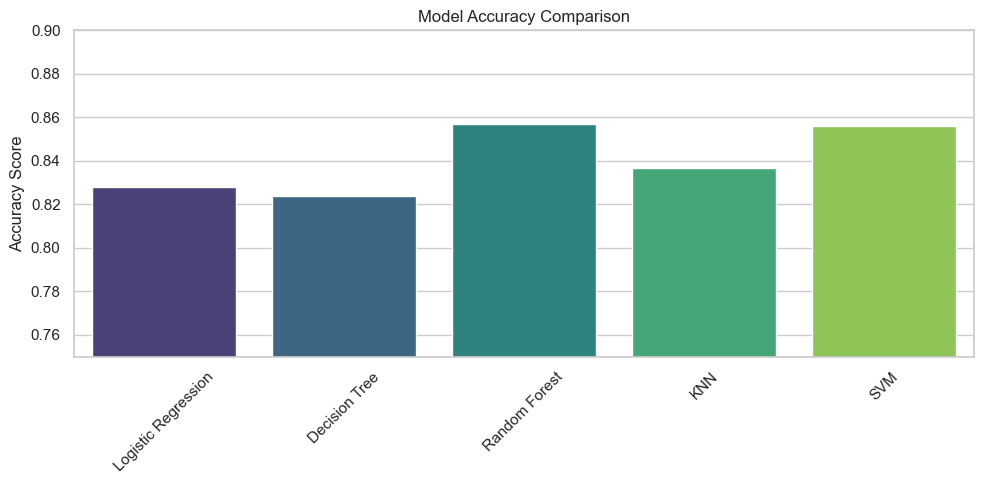

In [88]:
# Cell 18: Compare model accuracies with a bar chart

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM']
accuracies = [
    accuracy_score(y_test, y_pred_log),
    accuracy_score(y_test, y_pred_tree),
    accuracy_score(y_test, y_pred_forest),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_svm)
]



plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=accuracies, hue=models, palette='viridis', dodge=False, legend=False)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.ylim(0.75, 0.90)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [89]:
# Cell 19: XGBoost Classifier
!pip install xgboost


from xgboost import XGBClassifier

# Initialize model
xgb_model = XGBClassifier( eval_metric='logloss')

# Train
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("🟢 XGBoost Results")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


🟢 XGBoost Results
Accuracy: 0.8789026512437301

Confusion Matrix:
 [[7025  454]
 [ 729 1561]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92      7479
           1       0.77      0.68      0.73      2290

    accuracy                           0.88      9769
   macro avg       0.84      0.81      0.82      9769
weighted avg       0.88      0.88      0.88      9769



In [90]:
# Cell 19:gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test)

# Evaluate
print("🟡 Gradient Boosting Results")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))


🟡 Gradient Boosting Results
Accuracy: 0.8717371276486846

Confusion Matrix:
 [[7094  385]
 [ 868 1422]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      7479
           1       0.79      0.62      0.69      2290

    accuracy                           0.87      9769
   macro avg       0.84      0.78      0.81      9769
weighted avg       0.87      0.87      0.87      9769



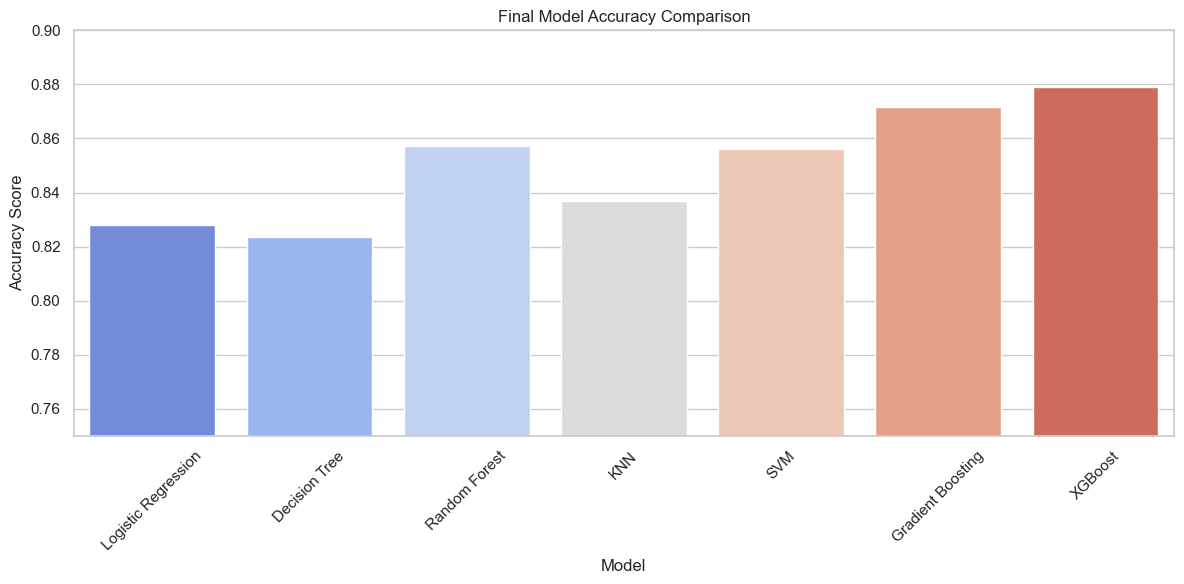

In [91]:
# Cell 20: Model Accuracy Comparison Chart (No FutureWarning)

models = [
    'Logistic Regression',
    'Decision Tree',
    'Random Forest',
    'KNN',
    'SVM',
    'Gradient Boosting',
    'XGBoost'
]

accuracies = [
    accuracy_score(y_test, y_pred_log),
    accuracy_score(y_test, y_pred_tree),
    accuracy_score(y_test, y_pred_forest),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_gb),
    accuracy_score(y_test, y_pred_xgb)
]

# Create DataFrame for plotting
acc_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})

plt.figure(figsize=(12, 6))
sns.barplot(data=acc_df, x='Model', y='Accuracy', hue='Model', palette='coolwarm', legend=False)  # hue added
plt.title("Final Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.ylim(0.75, 0.90)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [92]:
# Final Accuracy Scores for All Models

print("🔍 Final Accuracy Scores:\n")
print("📘 Logistic Regression       :", round(accuracy_score(y_test, y_pred_log), 4))
print("🌳 Decision Tree             :", round(accuracy_score(y_test, y_pred_tree), 4))
print("🌲 Random Forest             :", round(accuracy_score(y_test, y_pred_forest), 4))
print("🔵 K-Nearest Neighbors (KNN):", round(accuracy_score(y_test, y_pred_knn), 4))
print("🟣 Support Vector Machine    :", round(accuracy_score(y_test, y_pred_svm), 4))
print("🟡 Gradient Boosting         :", round(accuracy_score(y_test, y_pred_gb), 4))
print("🟢 XGBoost                   :", round(accuracy_score(y_test, y_pred_xgb), 4))


🔍 Final Accuracy Scores:

📘 Logistic Regression       : 0.8279
🌳 Decision Tree             : 0.8237
🌲 Random Forest             : 0.8571
🔵 K-Nearest Neighbors (KNN): 0.8368
🟣 Support Vector Machine    : 0.8561
🟡 Gradient Boosting         : 0.8717
🟢 XGBoost                   : 0.8789


In [93]:
import joblib

# Save XGBoost model
joblib.dump(xgb_model, "models/salary_model.pkl")

# Save StandardScaler
joblib.dump(scaler, "models/scaler.pkl")

# Save column names
joblib.dump(X.columns.tolist(), "models/feature_columns.pkl")

print("✅ Model, Scaler, and Column Names Saved!")


✅ Model, Scaler, and Column Names Saved!
